In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

In [2]:
x_data = np.linspace(0.0,10.0,1000000)

In [3]:
noise = np.random.randn(len(x_data))

In [4]:
#y=mx+b

y_true = (0.5 * x_data) + 5+noise

In [5]:
x_df = pd.DataFrame(data=x_data, columns=['X Data'])

In [6]:
y_df = pd.DataFrame(data=y_true, columns=['Y'])

In [7]:
my_data = pd.concat([x_df,y_df],axis=1)

<AxesSubplot:xlabel='X Data', ylabel='Y'>

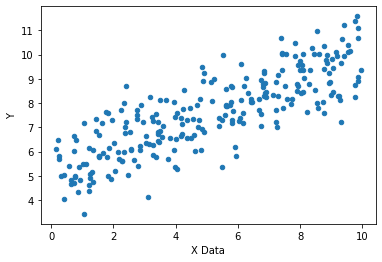

In [8]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')

In [9]:
batch_size = 8
m = tf.Variable(0.47994818)
b = tf.Variable(0.89323697)

In [10]:
np.random.randn(2)

array([ 0.27365386, -1.05426874])

In [11]:
xph = tf.placeholder(tf.float32,[batch_size])
yph = tf.placeholder(tf.float32,[batch_size])

In [12]:
y_model = m * xph + b

In [13]:
error = tf.reduce_sum(tf.square(yph-y_model)) #loss function

In [14]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)
init = tf.global_variables_initializer()

In [15]:
with tf.Session() as sess:
    sess.run(init)
    
    batches = 10000 #10000 batches sent 
    
    for i in range(batches):
        rand_ind = np.random.randint(len(x_data),size=batch_size)
        
        feed = {xph:x_data[rand_ind],yph: y_true[rand_ind]}
        
        sess.run(train,feed_dict=feed)
    model_m, model_b = sess.run([m,b])

In [16]:
y_hat  = x_data * model_m + model_b

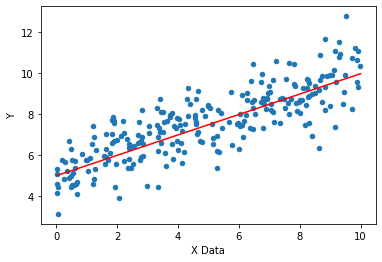

In [17]:
my_data.sample(250).plot(kind='scatter',x='X Data',y='Y')
plt.plot(x_data, y_hat,'r')

In [ ]:
## Different types of estimator

In [18]:
feat_cols = [tf.feature_column.numeric_column('x',shape=[1])]

In [19]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/1n/vd8s5f_j7pvfj3kwzb68gf3m0000gn/T/tmp6ihh5nut', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x14030efd0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data,y_true,test_size=0.3,random_state=101)

In [26]:
input_func = tf.estimator.inputs.numpy_input_fn({'x':X_train},y_train,batch_size=8,num_epochs=None,shuffle=True)

In [27]:
train_input_func = tf.estimator.inputs.numpy_input_fn({'x':X_train},y_train,batch_size=8,num_epochs=1000,shuffle=False)

In [28]:
test_input_func = tf.estimator.inputs.numpy_input_fn({'x':X_test},y_test,batch_size=8,num_epochs=1000,shuffle=False)

In [29]:
estimator.train(input_fn=input_func,steps=1000)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use `tf.cast` instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/1n/vd8

In [30]:
train_metrics = estimator.evaluate(input_fn=train_input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-08-17T14:11:26Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/1n/vd8s5f_j7pvfj3kwzb68gf3m0000gn/T/tmp6ihh5nut/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2020-08-17-14:11:29
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.0941967, global_step = 1000, label/mean = 7.510667, loss = 8.753573, prediction/mean = 7.2896237
INFO:tensorflow:Saving '

In [31]:
eval_metrics = estimator.evaluate(input_fn = test_input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-08-17T14:12:49Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/1n/vd8s5f_j7pvfj3kwzb68gf3m0000gn/T/tmp6ihh5nut/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2020-08-17-14:12:52
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.1319194, global_step = 1000, label/mean = 7.4587846, loss = 9.055355, prediction/mean = 7.2681437
INFO:tensorflow:Saving 

In [32]:
print('Training Data metrics')
print(train_metrics)

Training Data metrics
{'average_loss': 1.0941967, 'label/mean': 7.510667, 'loss': 8.753573, 'prediction/mean': 7.2896237, 'global_step': 1000}


In [33]:
print('Testing Data metrics')
print(eval_metrics)

Testing Data metrics
{'average_loss': 1.1319194, 'label/mean': 7.4587846, 'loss': 9.055355, 'prediction/mean': 7.2681437, 'global_step': 1000}


In [34]:
brand_new_data = np.linspace(0,10,10)
input_fn_predict = tf.estimator.inputs.numpy_input_fn({'x': brand_new_data},shuffle=False)

In [36]:
list(estimator.predict(input_fn=input_fn_predict))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/1n/vd8s5f_j7pvfj3kwzb68gf3m0000gn/T/tmp6ihh5nut/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'predictions': array([4.3162537], dtype=float32)},
 {'predictions': array([4.976704], dtype=float32)},
 {'predictions': array([5.6371546], dtype=float32)},
 {'predictions': array([6.297605], dtype=float32)},
 {'predictions': array([6.9580555], dtype=float32)},
 {'predictions': array([7.6185055], dtype=float32)},
 {'predictions': array([8.278956], dtype=float32)},
 {'predictions': array([8.939407], dtype=float32)},
 {'predictions': array([9.599857], dtype=float32)},
 {'predictions': array([10.260307], dtype=float32)}]

In [37]:
predictions = []

for pred in estimator.predict(input_fn=input_fn_predict):
    predictions.append(pred['predictions'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/1n/vd8s5f_j7pvfj3kwzb68gf3m0000gn/T/tmp6ihh5nut/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [38]:
predictions

[array([4.3162537], dtype=float32),
 array([4.976704], dtype=float32),
 array([5.6371546], dtype=float32),
 array([6.297605], dtype=float32),
 array([6.9580555], dtype=float32),
 array([7.6185055], dtype=float32),
 array([8.278956], dtype=float32),
 array([8.939407], dtype=float32),
 array([9.599857], dtype=float32),
 array([10.260307], dtype=float32)]

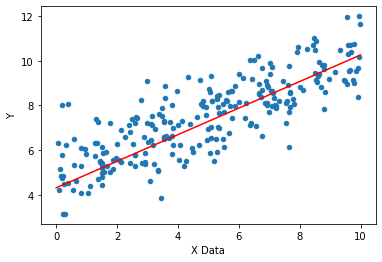

In [40]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')
plt.plot(brand_new_data,predictions,'r')